# Report Team 9: Sustainable water resources in the United States

## 1. Executive Summary

Today, the sustainable management of water resources is a key objective our team decided to tackle. In the meantime, water pollution and water consumption are two significant threats to this endeavor that we thought could be analyzed using the datasets available. Therefore, the issue around which our report is organized is the following:

#### Which economic factors are most predictive of high water pollution and water consumption levels?

We followed similar steps to identify predictive factors to the two variables of water consumption and water pollution and proceeded as follows:

#### I. Definition of the variables to predict: water pollution and water consumption levels
#### II. Visualizations on a map of the US territory
#### III. Core work on features engineering and regression
#### IV. Conclusion

### Insights obtained

Blabla final

## 2. Technical exposition

#### Modules Import

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.tools as tls
tls.set_credentials_file(username='asabran', api_key='70kL1XZ3YJICFB3M66O5')

plt.rcParams['figure.figsize'] = (15.0, 10.0)

#### Datasets import

In [10]:
data_chemicals = pd.read_csv("chemicals.csv", encoding = "utf-8")
data_drought = pd.read_csv("droughts.csv", encoding = "utf-8")
data_education = pd.read_csv("education_attainment.csv", encoding = "latin1")
data_industry_occupation = pd.read_csv("industry_occupation.csv", encoding="latin1")
data_industry_earnings = pd.read_csv("earnings.csv", encoding="latin1")

### 2.1 Analysis of water pollution

#### I. Water pollution definition

The definition of a proper water pollution metric proved challenging. First, we decided to focus on water pollution by chemicals: the only direct pollution measure available in the dataset, in the table **chemicals**:

In [11]:
data_chemicals.head()

,cws_name,chemical_species,contaminant_level,county,pws_id,pop_served,state,unit_measurement,value,year,fips,state_fips
0,CALIFORNIA WATER SERVICE - LIVERMORE,Uranium,Less than or equal MCL,Alameda,CA0110003,57200,California,micrograms/L,1.54,2000,6001,6
1,CITY OF LIVERMORE,Uranium,Less than or equal MCL,Alameda,CA0110011,26400,California,micrograms/L,1.64,2000,6001,6
2,CITY OF PLEASANTON,Uranium,Less than or equal MCL,Alameda,CA0110008,70600,California,micrograms/L,1.64,2000,6001,6
3,DUBLIN SAN RAMON SERVICES DISTRICT,Uranium,Less than or equal MCL,Alameda,CA0110009,72500,California,micrograms/L,1.64,2000,6001,6
4,NORRIS CANYON PROPERTY OWNERS ASSN,Uranium,Less than or equal MCL,Alameda,CA0103040,100,California,micrograms/L,4.51,2000,6001,6


- The geographical scale we retained is the **county**

The challenge is then to aggregate chemicals data in a sensible way at the county level. To do so, we chose the following **assumption and definition**:

- The **volume of water** consumed by human activities on a county's territory is assumed to be proportional to the total population of the county
- The **level of chemicals** spread in the volume of water distributed by a given water system **cws**, in a given county, is defined as the number $N$ of contaminants whose level in this water system is classified to 'greater_than_MCL'. This $N$ is then averaged on all the water systems in the county, with *weights* equal to the population supplied by each water system.

Given the above assumption on any county's water volume, the definition of a county's chemical level as a weighted averaged of contaminants in high concentrations is consistent, because the weights correspond to populations supplied by water systems and sum to the county's total population.

#### Data wrangling to obtain the chemicals_index:

In [12]:
data_chemicals['greater_than_MCL'] = (data_chemicals['contaminant_level'] == "Greater than MCL") * 1.
groups = data_chemicals.groupby(["year", "pws_id"])['pop_served', 'greater_than_MCL'].mean()
groups['greater_than_MCL'] *= data_chemicals.groupby(["year", "pws_id"])['greater_than_MCL'].count()
groups['index_weight'] = groups['pop_served'] * groups['greater_than_MCL']
final_groups = groups.groupby("year")['index_weight'].sum() / groups.groupby("year")['pop_served'].sum()

In [13]:
data_chemicals = data_chemicals[data_chemicals['year']==2010]
data_chemicals = data_chemicals.set_index(data_chemicals['fips'])
groups = data_chemicals.groupby("cws_name")[['greater_than_MCL', 'fips', "pop_served"]].mean()
groups['greater_than_MCL'] *= data_chemicals.groupby("cws_name")['greater_than_MCL'].count()
groups['index_with_weights'] = groups['greater_than_MCL']*groups['pop_served']
groups['fips'] = groups['fips'].astype(int)
chemicals_index = groups.groupby("fips")['index_with_weights'].sum() / groups.groupby("fips")['pop_served'].sum()

#### II. Visualization: countys with highest water pollution levels

In [16]:
eighty_quantile=chemicals_index.quantile(.75)
chemicals_index_eighty=chemicals_index[chemicals_index>eighty_quantile]

bins=[]

for q in np.linspace(0,1,5):
    bins.append(chemicals_index_eighty.quantile(q))

fig = ff.create_choropleth(fips=chemicals_index_eighty.index.values, values=chemicals_index_eighty,binning_endpoints=bins)
py.iplot(fig, filename="Top 75% polluted counties ")

C:\Users\User\AppData\Local\conda\conda\envs\tf-gpu\lib\site-packages\plotly\figure_factory\_county_choropleth.py:771: UserWarning:

Unrecognized FIPS Values

Whoops! It looks like you are trying to pass at least one FIPS value that is not in our shapefile of FIPS and data for the counties. Your choropleth will still show up but these counties cannot be shown.
Unrecognized FIPS are: [19633, 28473, 31868, 32261, 37520, 37606, 37608, 40423, 42012]



This map shows the top 25% of counties with the highest water pollution levels. It seems that industrial states in the North-East and agricultural states in the center are most associated with high water pollution levels. Following this intuition, we tried to explain water pollution levels in any county by the relative share of each industry in those counties.

#### III. Features set 1: Industry shares in each county

#### III. Features set 2: Industry profitability

#### IV. Conclusion

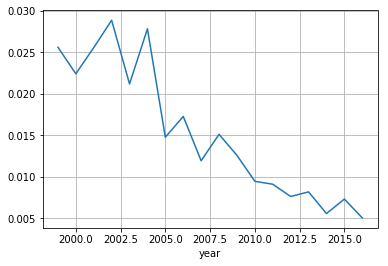

In [6]:
final_groups.plot()
plt.grid()

### 2.2 Analysis of water consumption

### 2.1 Analysis of water pollution

#### I. Water pollution definition

The definition of a proper water pollution metric proved challenging. First, we decided to focus on water pollution by chemicals: the only direct pollution measure available in the dataset, in the table **chemicals**:

In [11]:
data_chemicals.head()

,cws_name,chemical_species,contaminant_level,county,pws_id,pop_served,state,unit_measurement,value,year,fips,state_fips
0,CALIFORNIA WATER SERVICE - LIVERMORE,Uranium,Less than or equal MCL,Alameda,CA0110003,57200,California,micrograms/L,1.54,2000,6001,6
1,CITY OF LIVERMORE,Uranium,Less than or equal MCL,Alameda,CA0110011,26400,California,micrograms/L,1.64,2000,6001,6
2,CITY OF PLEASANTON,Uranium,Less than or equal MCL,Alameda,CA0110008,70600,California,micrograms/L,1.64,2000,6001,6
3,DUBLIN SAN RAMON SERVICES DISTRICT,Uranium,Less than or equal MCL,Alameda,CA0110009,72500,California,micrograms/L,1.64,2000,6001,6
4,NORRIS CANYON PROPERTY OWNERS ASSN,Uranium,Less than or equal MCL,Alameda,CA0103040,100,California,micrograms/L,4.51,2000,6001,6


- The geographical scale we retained is the **county**

The challenge is then to aggregate chemicals data in a sensible way at the county level. To do so, we chose the following **assumption and definition**:

- The **volume of water** consumed by human activities on a county's territory is assumed to be proportional to the total population of the county
- The **level of chemicals** spread in the volume of water distributed by a given water system **cws**, in a given county, is defined as the number $N$ of contaminants whose level in this water system is classified to 'greater_than_MCL'. This $N$ is then averaged on all the water systems in the county, with *weights* equal to the population supplied by each water system.

Given the above assumption on any county's water volume, the definition of a county's chemical level as a weighted averaged of contaminants in high concentrations is consistent, because the weights correspond to populations supplied by water systems and sum to the county's total population.

#### Data wrangling to obtain the chemicals_index:

In [12]:
data_chemicals['greater_than_MCL'] = (data_chemicals['contaminant_level'] == "Greater than MCL") * 1.
groups = data_chemicals.groupby(["year", "pws_id"])['pop_served', 'greater_than_MCL'].mean()
groups['greater_than_MCL'] *= data_chemicals.groupby(["year", "pws_id"])['greater_than_MCL'].count()
groups['index_weight'] = groups['pop_served'] * groups['greater_than_MCL']
final_groups = groups.groupby("year")['index_weight'].sum() / groups.groupby("year")['pop_served'].sum()

In [13]:
data_chemicals = data_chemicals[data_chemicals['year']==2010]
data_chemicals = data_chemicals.set_index(data_chemicals['fips'])
groups = data_chemicals.groupby("cws_name")[['greater_than_MCL', 'fips', "pop_served"]].mean()
groups['greater_than_MCL'] *= data_chemicals.groupby("cws_name")['greater_than_MCL'].count()
groups['index_with_weights'] = groups['greater_than_MCL']*groups['pop_served']
groups['fips'] = groups['fips'].astype(int)
chemicals_index = groups.groupby("fips")['index_with_weights'].sum() / groups.groupby("fips")['pop_served'].sum()

#### II. Visualization: countys with highest water pollution levels

In [16]:
eighty_quantile=chemicals_index.quantile(.75)
chemicals_index_eighty=chemicals_index[chemicals_index>eighty_quantile]

bins=[]

for q in np.linspace(0,1,5):
    bins.append(chemicals_index_eighty.quantile(q))

fig = ff.create_choropleth(fips=chemicals_index_eighty.index.values, values=chemicals_index_eighty,binning_endpoints=bins)
py.iplot(fig, filename="Top 75% polluted counties ")

C:\Users\User\AppData\Local\conda\conda\envs\tf-gpu\lib\site-packages\plotly\figure_factory\_county_choropleth.py:771: UserWarning:

Unrecognized FIPS Values

Whoops! It looks like you are trying to pass at least one FIPS value that is not in our shapefile of FIPS and data for the counties. Your choropleth will still show up but these counties cannot be shown.
Unrecognized FIPS are: [19633, 28473, 31868, 32261, 37520, 37606, 37608, 40423, 42012]



This map shows the top 25% of counties with the highest water pollution levels. It seems that industrial states in the North-East and agricultural states in the center are most associated with high water pollution levels. Following this intuition, we tried to explain water pollution levels in any county by the relative share of each industry in those counties.

#### III. Features set 1: Industry shares in each county

#### III. Features set 2: Industry profitability

#### IV. Conclusion

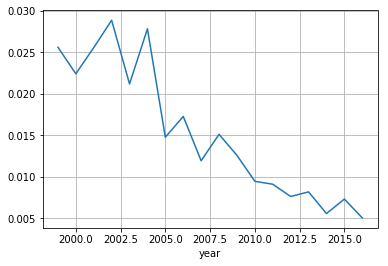

In [6]:
final_groups.plot()
plt.grid()